## Imports

In [97]:
import copy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import torch
import torch.onnx
import torch.nn as nn
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [98]:
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

In [99]:
## Data mining


In [100]:
df_org = pd.read_csv('train_data.csv')
# df[['Year', 'Month', 'Day']] = df['dteday'].str.split('-', expand=True)
df_eval_org = pd.read_csv('test_data.csv')

In [101]:
df = df_org.copy()
df_eval = df_eval_org.copy()

In [102]:
df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4120,307079,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0


In [103]:
df_eval

,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,1993,914,10,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
1,2014,907,16,terraced,individual_heating,management_in_trust,90.0,1174.0,0~5min,0-5min,7.0,20.0,Myung-duk,9,14.0,17.0
2,2007,1629,7,terraced,individual_heating,management_in_trust,7.0,605.0,0~5min,0-5min,5.0,5.0,Banwoldang,5,9.0,5.0
3,2005,743,21,mixed,individual_heating,management_in_trust,67.0,798.0,0~5min,5min~10min,6.0,0.0,Bangoge,7,13.0,15.0
4,2006,903,7,terraced,individual_heating,management_in_trust,123.0,181.0,5min~10min,0-5min,3.0,11.0,Myung-duk,4,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,2006,2056,2,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
1763,2007,1394,7,terraced,individual_heating,management_in_trust,554.0,524.0,0~5min,0-5min,5.0,10.0,Banwoldang,4,9.0,8.0
1764,1993,644,20,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
1765,2008,914,11,terraced,individual_heating,management_in_trust,197.0,475.0,5min~10min,0-5min,6.0,14.0,Sin-nam,8,7.0,9.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  4124 non-null   int64  
 1   YearBuilt                  4124 non-null   int64  
 2   Size(sqf)                  4124 non-null   int64  
 3   Floor                      4124 non-null   int64  
 4   HallwayType                4124 non-null   object 
 5   HeatingType                4124 non-null   object 
 6   AptManageType              4124 non-null   object 
 7   N_Parkinglot(Ground)       4124 non-null   float64
 8   N_Parkinglot(Basement)     4124 non-null   float64
 9   TimeToBusStop              4124 non-null   object 
 10  TimeToSubway               4124 non-null   object 
 11  N_manager                  4124 non-null   float64
 12  N_elevators                4124 non-null   float64
 13  SubwayStation              4124 non-null   objec

In [105]:
class0 = df.loc[(df['SalePrice'] <= 100000)]
class1 = df.loc[(df['SalePrice'] >= 100000) & (df['SalePrice'] <= 350000)]
class2 = df.loc[(df['SalePrice'] >= 350000)]

In [106]:
class1 = class1.sample(n = 570, random_state=42)
df_undersampled = [class0, class1, class2]
df_undersampled = pd.concat(df_undersampled)
df_undersampled = df_undersampled.sample(frac=1, random_state=42)
df_undersampled

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
3329,146256,2013,644,19,terraced,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,6.0,14.0,Kyungbuk_uni_hospital,7,9.0,11.0
2228,269911,1993,2337,14,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
3067,353982,2013,910,3,terraced,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,6.0,14.0,Kyungbuk_uni_hospital,7,9.0,11.0
772,39823,1992,355,8,corridor,individual_heating,management_in_trust,200.0,0.0,5min~10min,10min~15min,5.0,10.0,Myung-duk,3,16.0,17.0
3142,77876,1992,355,9,corridor,individual_heating,management_in_trust,200.0,0.0,5min~10min,10min~15min,5.0,10.0,Myung-duk,3,16.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,173451,1986,914,1,terraced,central_heating,management_in_trust,713.0,0.0,0~5min,10min~15min,8.0,27.0,Kyungbuk_uni_hospital,4,9.0,6.0
2199,367256,2006,2056,10,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
3694,340707,2014,914,4,terraced,individual_heating,management_in_trust,467.0,203.0,0~5min,0-5min,5.0,12.0,Banwoldang,10,0.0,0.0
3155,389380,2006,1149,15,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0


In [107]:
df = df_undersampled

In [108]:
new_col = df['SalePrice'].apply(lambda x: 2 if (x > 300_000) else
                                        1 if (x > 100_000) else
                                        0)
df.insert(1, 'PriceCategory', new_col)
df

,SalePrice,PriceCategory,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
3329,146256,1,2013,644,19,terraced,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,6.0,14.0,Kyungbuk_uni_hospital,7,9.0,11.0
2228,269911,1,1993,2337,14,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
3067,353982,2,2013,910,3,terraced,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,6.0,14.0,Kyungbuk_uni_hospital,7,9.0,11.0
772,39823,0,1992,355,8,corridor,individual_heating,management_in_trust,200.0,0.0,5min~10min,10min~15min,5.0,10.0,Myung-duk,3,16.0,17.0
3142,77876,0,1992,355,9,corridor,individual_heating,management_in_trust,200.0,0.0,5min~10min,10min~15min,5.0,10.0,Myung-duk,3,16.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,173451,1,1986,914,1,terraced,central_heating,management_in_trust,713.0,0.0,0~5min,10min~15min,8.0,27.0,Kyungbuk_uni_hospital,4,9.0,6.0
2199,367256,2,2006,2056,10,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
3694,340707,2,2014,914,4,terraced,individual_heating,management_in_trust,467.0,203.0,0~5min,0-5min,5.0,12.0,Banwoldang,10,0.0,0.0
3155,389380,2,2006,1149,15,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0


In [109]:
numerical_columns = ["YearBuilt", "Size(sqf)", "Floor", "N_Parkinglot(Ground)", "N_Parkinglot(Basement)", "N_manager", "N_elevators", "N_FacilitiesInApt", "N_FacilitiesNearBy(Total)", "N_SchoolNearBy(Total)"]

In [110]:
categorical_columns = ["HallwayType", "HeatingType", "AptManageType", "TimeToBusStop", "TimeToSubway", "SubwayStation"]

In [111]:
one_hot = pd.get_dummies(df[categorical_columns])
one_hot_eval = pd.get_dummies(df_eval[categorical_columns])

In [112]:
df.drop(columns=categorical_columns, inplace=True)
df_eval.drop(columns=categorical_columns, inplace=True)


In [113]:
df_train = df.sample(frac=0.8,random_state=200) #random state is a seed value
df_test = df.drop(df_train.index)

cat_train = one_hot.sample(frac=0.8,random_state=200) #random state is a seed value
cat_test = one_hot.drop(cat_train.index)

numerical_data = torch.from_numpy(df_train.values[:, 2:]).float()
categorical_data = torch.from_numpy(cat_train.values).float()
targets = torch.from_numpy(df_train.values[:, 1]).float()

test_numerical_data = torch.from_numpy(df_test.values[:, 2:]).float()
test_categorical_data = torch.from_numpy(cat_test.values).float()
test_targets = torch.from_numpy(df_test.values[:, 1]).float()

eval_numerical_data = torch.from_numpy(df_eval.values).float()
eval_categorical_data = torch.from_numpy(one_hot_eval.values).float()

In [114]:
numerical_data.shape

torch.Size([1362, 10])

In [115]:
train_dataset = data.TensorDataset(numerical_data,categorical_data,targets)
test_dataset = data.TensorDataset(test_numerical_data,test_categorical_data,test_targets)
eval_dataset = data.TensorDataset(eval_numerical_data, eval_categorical_data)

In [116]:
train_data_loader = data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_data_loader = data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True, drop_last=False)
data_loaders = {'train': train_data_loader, 'test':test_data_loader}
eval_data_loader = data.DataLoader(eval_dataset, batch_size=len(eval_dataset), shuffle=False, drop_last=False)

In [117]:
list(train_dataset[0])

[tensor([2005.,  572.,   21.,   67.,  798.,    6.,    0.,    7.,   13.,   15.]),
 tensor([0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0.]),
 tensor(0.)]

In [118]:
class ApartmentClassifier(nn.Module):

    def __init__(self, num_hidden1, num_hidden2, num_outputs):
        super().__init__()
        self.layer1 = nn.Linear(numerical_data.shape[1] + categorical_data.shape[1], num_hidden1)
        # self.bn1 = nn.BatchNorm1d(num_hidden1)
        self.act_f1 = nn.ReLU()
        self.d1 = nn.Dropout(0.01)

        self.layer2 = nn.Linear(num_hidden1, num_hidden2)
        # self.bn2 = nn.BatchNorm1d(num_hidden2)
        self.act_f2 = nn.ReLU()
        self.d2 = nn.Dropout(0.01)

        self.layer3= nn.Linear(num_hidden2, num_outputs)


    def forward(self, x, cat_x):
        x = torch.cat([x,cat_x],dim=1)
        x = self.layer1(x)
        # x = self.bn1(x)
        x = self.act_f1(x)
        x = self.d1(x)

        x = self.layer2(x)
        # x = self.bn2(x)
        x = self.act_f2(x)
        x = self.d2(x)

        x = self.layer3(x)

        return x

In [119]:
def get_correct(predictions, targets):
    correct = 0
    pred = torch.argmax(predictions, dim=1)
    correct += pred.eq(targets.view_as(pred).to(device)).sum().item()
    return correct

In [120]:


def l1_regularization(model, l1_lambda):
    sum_layer1_params = sum(abs(p).sum() for p in model.layer1.parameters())
    sum_layer2_params = sum(abs(p).sum() for p in model.layer2.parameters())
    l1_reg = l1_lambda * (sum_layer1_params + sum_layer2_params )
    return l1_reg


In [121]:

def train_model(model, data_loaders, loss_module, optimizer, scheduler, l1_lambda, num_epochs=100):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    history = {}
    training_loss, training_acc, test_loss, test_acc = [], [], [], []
    for epoch in range(num_epochs):
        for phase in ['train', 'test']:
            if phase =='train':
                model.train()
            else:
                model.eval()
            running_loss = 0.0
            running_corrects = 0

            for num_inputs, cat_inputs, targets in data_loaders[phase]:
                num_inputs = num_inputs.to(device)
                cat_inputs = cat_inputs.to(device)
                targets = targets.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    predictions = model(num_inputs, cat_inputs)
                    predictions = predictions.squeeze(dim=1)
                    loss = loss_module(predictions, targets.long())
                    # loss = loss + l1_regularization(model, l1_lambda)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * num_inputs.size(0)
                running_corrects += get_correct(predictions, targets)
            # if phase == 'train':
            #      scheduler.step()

            epoch_loss = running_loss / len(data_loaders[phase].dataset)
            epoch_acc = running_corrects / len(data_loaders[phase].dataset)
            if phase == 'train':
                training_loss.append(epoch_loss)
                training_acc.append(epoch_acc)
            else:
                test_loss.append(epoch_loss)
                test_acc.append(epoch_acc)

            print(f"Epoch {epoch}:",f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc*100:2f} %')
    history.update({'training_loss' : training_loss, 'training_acc': training_acc, 'test_loss' : test_loss, 'test_acc' : test_acc})
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, history

In [122]:
model = ApartmentClassifier(num_hidden1=16, num_hidden2=16, num_outputs=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.00001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
loss_module = nn.CrossEntropyLoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

ApartmentClassifier(
  (layer1): Linear(in_features=33, out_features=16, bias=True)
  (act_f1): ReLU()
  (d1): Dropout(p=0.01, inplace=False)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (act_f2): ReLU()
  (d2): Dropout(p=0.01, inplace=False)
  (layer3): Linear(in_features=16, out_features=3, bias=True)
)

In [123]:
_, history = train_model(model, data_loaders, loss_module, optimizer, scheduler, l1_lambda = 0.5, num_epochs=1000)

Epoch 0: train Loss: 17.6881 Acc: 0.3069
Epoch 0: test Loss: 3.8090 Acc: 0.3195
Epoch 1: train Loss: 3.7820 Acc: 0.5242
Epoch 1: test Loss: 4.6428 Acc: 0.5858
Epoch 2: train Loss: 3.3119 Acc: 0.6498
Epoch 2: test Loss: 2.7277 Acc: 0.5296
Epoch 3: train Loss: 1.7361 Acc: 0.6351
Epoch 3: test Loss: 1.1164 Acc: 0.5266
Epoch 4: train Loss: 0.9370 Acc: 0.6380
Epoch 4: test Loss: 0.6742 Acc: 0.7101
Epoch 5: train Loss: 0.8181 Acc: 0.6997
Epoch 5: test Loss: 0.6609 Acc: 0.6953
Epoch 6: train Loss: 0.6851 Acc: 0.7100
Epoch 6: test Loss: 0.5882 Acc: 0.7189
Epoch 7: train Loss: 0.6433 Acc: 0.7225
Epoch 7: test Loss: 0.6081 Acc: 0.7456
Epoch 8: train Loss: 0.5921 Acc: 0.7680
Epoch 8: test Loss: 0.6332 Acc: 0.6893
Epoch 9: train Loss: 0.5747 Acc: 0.7570
Epoch 9: test Loss: 0.5963 Acc: 0.7101
Epoch 10: train Loss: 0.5414 Acc: 0.7518
Epoch 10: test Loss: 0.5715 Acc: 0.6627
Epoch 11: train Loss: 0.5314 Acc: 0.7570
Epoch 11: test Loss: 0.5455 Acc: 0.7426
Epoch 12: train Loss: 0.4938 Acc: 0.7981
Epoch 

In [124]:
def run_eval():
    with torch.no_grad():
        num_inputs, cat_inputs = next(iter(eval_data_loader))
        num_inputs = num_inputs.to('cpu')
        cat_inputs = cat_inputs.to('cpu')
        model.to('cpu')
        predictions = model(num_inputs, cat_inputs)
        predictions = predictions.squeeze(dim=1)
        pred = torch.argmax(predictions, dim=1)

        new_df = pd.DataFrame(pred)
        # new_df = new_df['PriceCategory'].apply(lambda x: "expensive" if x == 2 else
        #                                 "average" if x == 1 else
        #                                 "cheap")

        new_df.to_csv("brus_maj.csv", index=False)
run_eval()

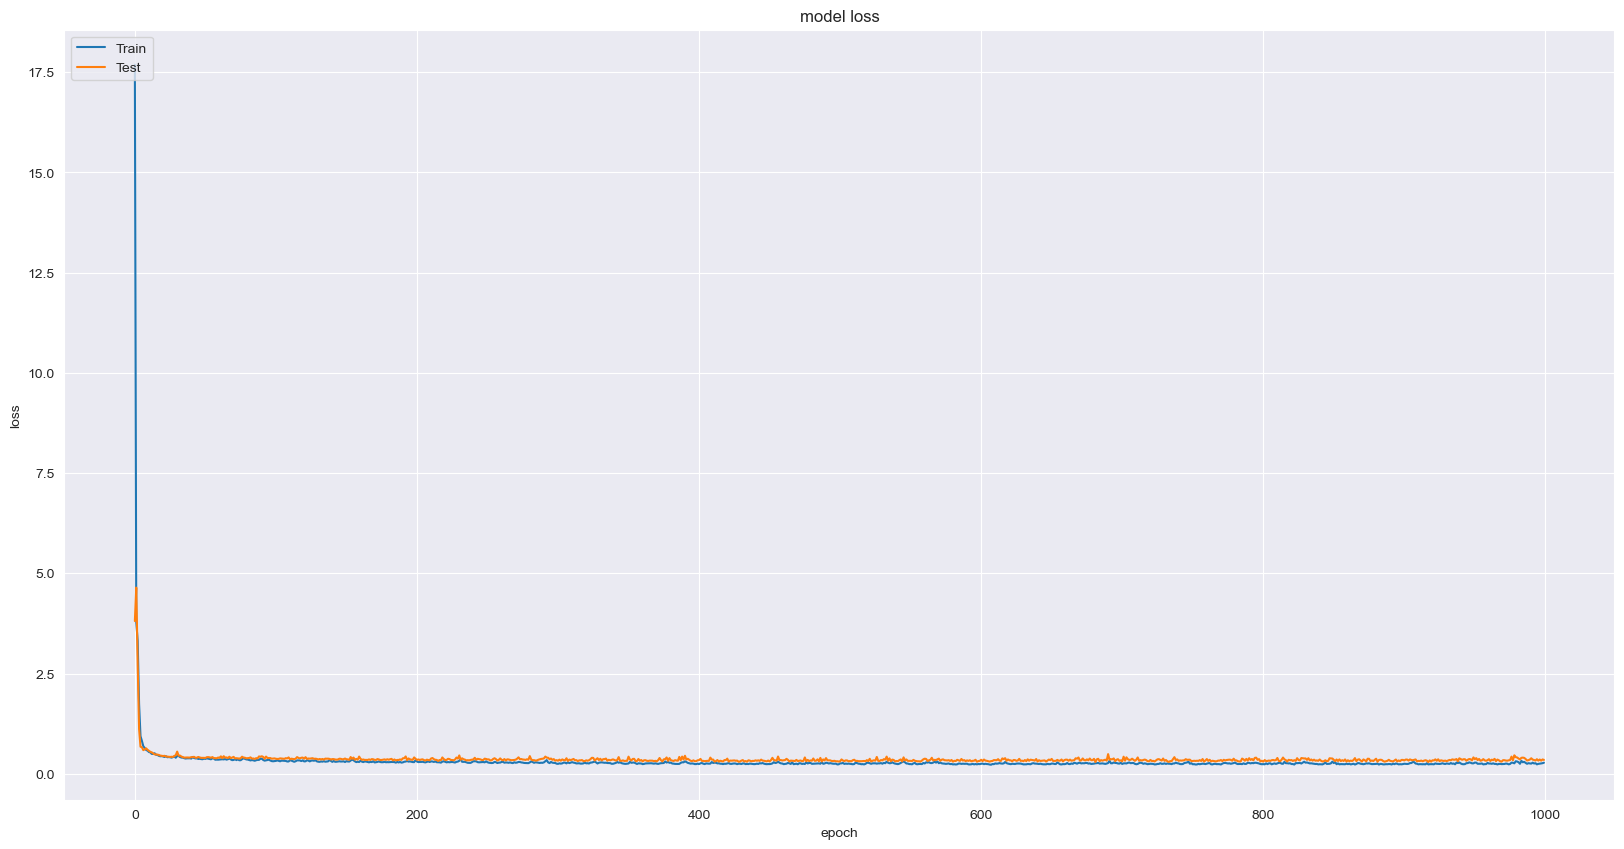

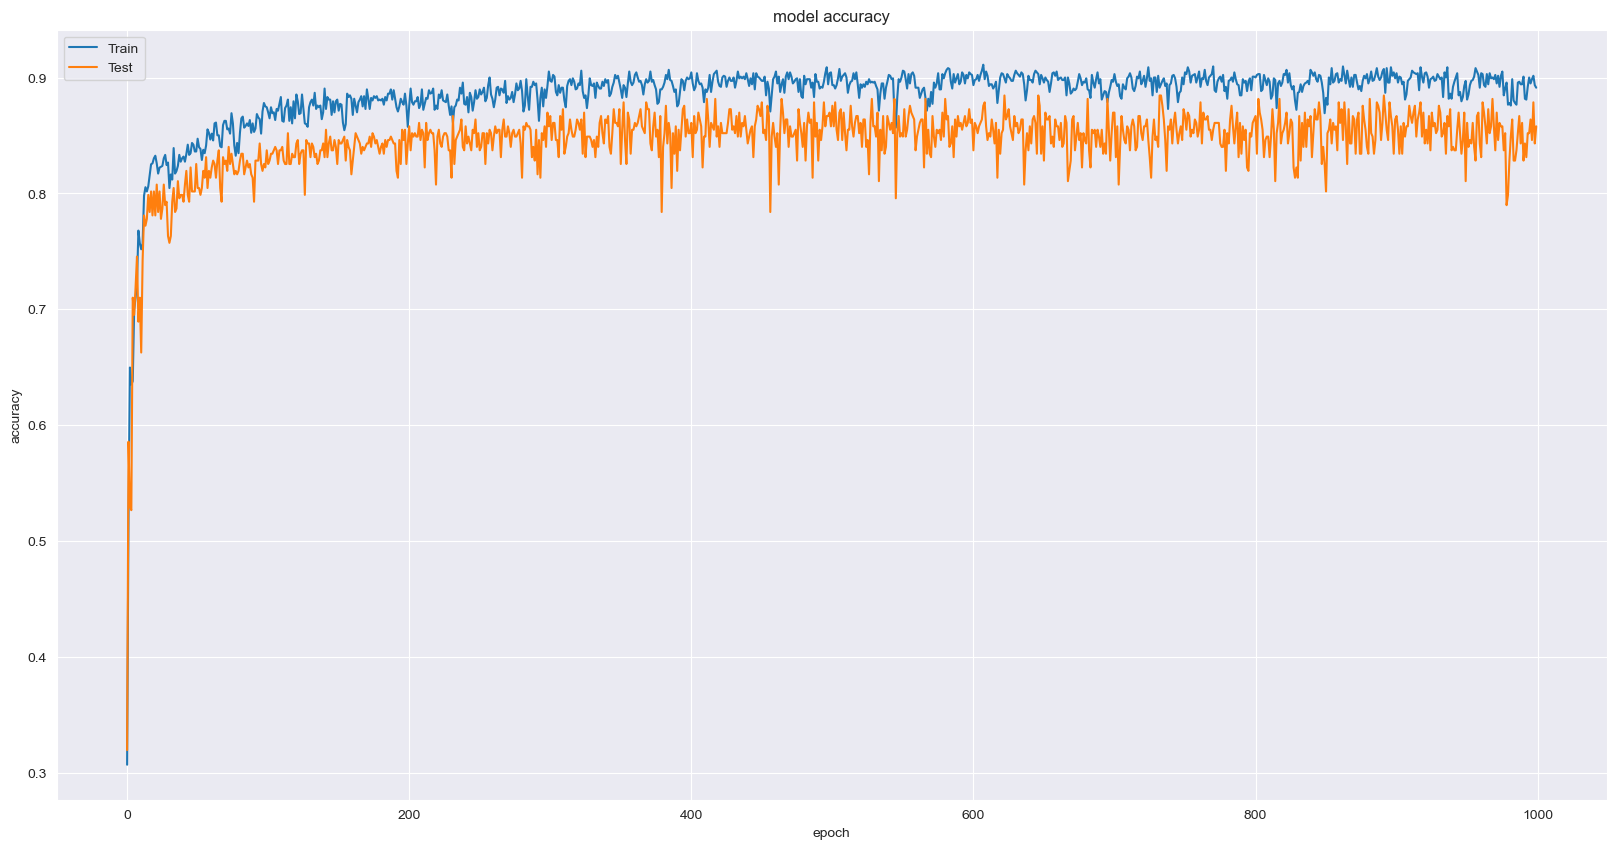

In [125]:
def my_plot(history):
    plt.figure(figsize=(20, 10))
    # plt.style.use("seaborn-paper")
    # summarize history for loss
    plt.plot(np.arange(len(history['training_loss'])),history['training_loss'])
    plt.plot(np.arange(len(history['training_loss'])),history['test_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
     # summarize history for accuracy
    plt.figure(figsize=(20, 10))
    plt.plot(np.arange(len(history['training_loss'])),history['training_acc'])
    plt.plot(np.arange(len(history['training_loss'])),history['test_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

my_plot(history)